# ¿Cómo se percibe el arbitraje?: análisis con procesamiento de lenguaje natural, américa del sur
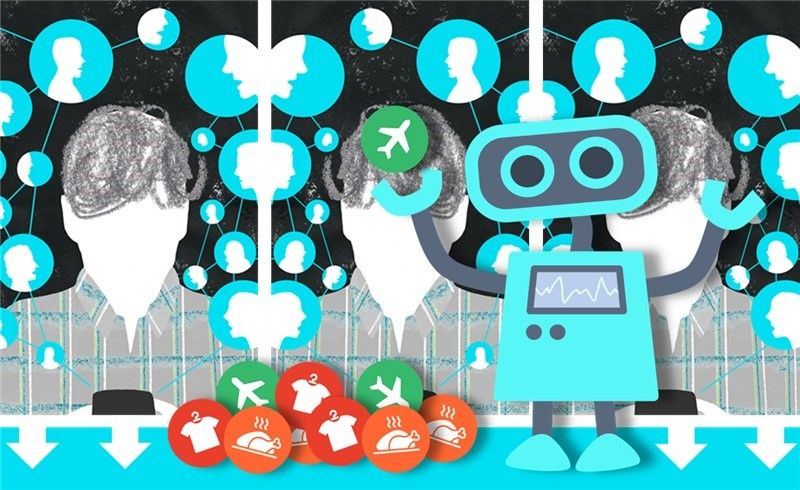

In [1]:
!pip install tweepy

In [1]:
import pandas as pd
import tweepy

In [2]:
# Leer llaves
keys = pd.read_csv("API_Tweter.csv", header=None, sep = '\t')

keys = dict(zip(keys[0],keys[1]))

In [3]:
# Autorizar a través API

In [4]:
#api.update_status('Prueba de API V.0.3 :)')

### Recolección de datos

In [5]:
tweets = tweepy.Cursor(api.search,
                       q=['tribunal arbitral -RT'],
                       lang='es',
                       geocode=f'4.60971,-74.08175,2000mi',
                       tweet_mode='extended',
                       include_rts=False).items(400)

In [6]:
tweets

In [7]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.place)
    temp.append(tweet.coordinates)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [8]:
t

[['#Colombia: Huelga en el Cerrejón cumple 80 días e intervendrá un Tribunal Arbitral https://t.co/EUP8pF5fcJ',
  datetime.datetime(2020, 11, 23, 14, 1, 46),
  'Bogotá',
  'Argentina',
  None,
  None,
  1330874182008250371,
  'https://twitter.com/i/web/status/1330874182008250371'],
 ['“Es ridículo en el derecho que un tribunal arbitral de inversiones comerciales determine un delito, siguiendo un juicio bajo normativa para seguir al crimen organizado en EEUU”. #PatricioSalazar \n\n🎙@CarlosVerareal en @aldia_opinionec \n\n📲App https://t.co/gPDaim3mIY https://t.co/vi6TD4SiJ9',
  datetime.datetime(2020, 11, 23, 12, 3, 17),
  'Bogotá',
  'Ecuador',
  Place(_api=<tweepy.api.API object at 0x000002793E7AAEC8>, id='4e43cac8250a8b20', url='https://api.twitter.com/1.1/geo/id/4e43cac8250a8b20.json', place_type='country', name='Ecuador', full_name='Ecuador', country_code='EC', country='Ecuador', contained_within=[], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x000002793E7AAEC8>, type='

In [9]:
data=pd.DataFrame(t)
data

,0,1,2,3,4,5,6,7
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Bogotá,Argentina,None,None,1330874182008250371,https://twitter.com/i/web/status/1330874182008...
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Bogotá,Ecuador,Place(_api=<tweepy.api.API object at 0x0000027...,None,1330844368232730626,https://twitter.com/i/web/status/1330844368232...
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Bogotá,Argentina,None,None,1330557550698393602,https://twitter.com/i/web/status/1330557550698...
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Bogotá,Argentina,None,None,1330543329252093953,https://twitter.com/i/web/status/1330543329252...
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,Bogotá,"Caracas, Venezuela",None,None,1330261654483906563,https://twitter.com/i/web/status/1330261654483...
5,"@isanellacc Porque todo se solucionó, sino se ...",2020-11-19 19:23:53,Bogotá,"Lima, Peru",None,None,1329505695524397059,https://twitter.com/i/web/status/1329505695524...
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,2020-11-19 19:06:31,Bogotá,México,None,None,1329501324749180930,https://twitter.com/i/web/status/1329501324749...
7,"La firma española Sacyr, confirmó que retiró s...",2020-11-19 12:15:00,Bogotá,Bogotá,None,None,1329397762526310402,https://twitter.com/i/web/status/1329397762526...


In [10]:
data.columns = ['tweet', 'date', 'city', 'user_location', 'place', 'coordinates', 'id','link']
data

,tweet,date,city,user_location,place,coordinates,id,link
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Bogotá,Argentina,None,None,1330874182008250371,https://twitter.com/i/web/status/1330874182008...
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Bogotá,Ecuador,Place(_api=<tweepy.api.API object at 0x0000027...,None,1330844368232730626,https://twitter.com/i/web/status/1330844368232...
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Bogotá,Argentina,None,None,1330557550698393602,https://twitter.com/i/web/status/1330557550698...
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Bogotá,Argentina,None,None,1330543329252093953,https://twitter.com/i/web/status/1330543329252...
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,Bogotá,"Caracas, Venezuela",None,None,1330261654483906563,https://twitter.com/i/web/status/1330261654483...
5,"@isanellacc Porque todo se solucionó, sino se ...",2020-11-19 19:23:53,Bogotá,"Lima, Peru",None,None,1329505695524397059,https://twitter.com/i/web/status/1329505695524...
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,2020-11-19 19:06:31,Bogotá,México,None,None,1329501324749180930,https://twitter.com/i/web/status/1329501324749...
7,"La firma española Sacyr, confirmó que retiró s...",2020-11-19 12:15:00,Bogotá,Bogotá,None,None,1329397762526310402,https://twitter.com/i/web/status/1329397762526...


In [11]:
data.to_csv("datos271120.csv", index=False)

### Preprocesamiento

In [12]:
data

,tweet,date,city,user_location,place,coordinates,id,link
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Bogotá,Argentina,None,None,1330874182008250371,https://twitter.com/i/web/status/1330874182008...
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Bogotá,Ecuador,Place(_api=<tweepy.api.API object at 0x0000027...,None,1330844368232730626,https://twitter.com/i/web/status/1330844368232...
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Bogotá,Argentina,None,None,1330557550698393602,https://twitter.com/i/web/status/1330557550698...
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Bogotá,Argentina,None,None,1330543329252093953,https://twitter.com/i/web/status/1330543329252...
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,Bogotá,"Caracas, Venezuela",None,None,1330261654483906563,https://twitter.com/i/web/status/1330261654483...
5,"@isanellacc Porque todo se solucionó, sino se ...",2020-11-19 19:23:53,Bogotá,"Lima, Peru",None,None,1329505695524397059,https://twitter.com/i/web/status/1329505695524...
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,2020-11-19 19:06:31,Bogotá,México,None,None,1329501324749180930,https://twitter.com/i/web/status/1329501324749...
7,"La firma española Sacyr, confirmó que retiró s...",2020-11-19 12:15:00,Bogotá,Bogotá,None,None,1329397762526310402,https://twitter.com/i/web/status/1329397762526...


In [13]:
data=data[['tweet', 'date', 'user_location']]
data

,tweet,date,user_location
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Argentina
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Ecuador
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Argentina
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Argentina
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,"Caracas, Venezuela"
5,"@isanellacc Porque todo se solucionó, sino se ...",2020-11-19 19:23:53,"Lima, Peru"
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,2020-11-19 19:06:31,México
7,"La firma española Sacyr, confirmó que retiró s...",2020-11-19 12:15:00,Bogotá


In [14]:
import re 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [15]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

C:\Users\villa\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,tweet,date,user_location,clean,links,hashtags,mentions
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Argentina,Huelga en el Cerrejón cumple 80 días e interv...,[https://t.co/EUP8pF5fcJ],[#Colombia:],[]
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Ecuador,“Es ridículo en el derecho que un tribunal arb...,"[https://t.co/gPDaim3mIY, https://t.co/vi6TD4S...",[#PatricioSalazar],[@aldia_opinionec]
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Argentina,Colombia: Huelga en el Cerrejón cumple 80 días...,[https://t.co/80xQLxr90f],[],[]
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Argentina,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,[https://t.co/cX0yHbuSnV],[#internacional],[]
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,"Caracas, Venezuela",Un secretario arbitral sólo debe ser designado...,"[https://t.co/yZWEp2vJmD, https://t.co/CfvFoqS...",[],[]


In [16]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto


In [17]:
data['preproces'] = data['clean'].apply(lambda texto: pre_procesado(texto))
data


,tweet,date,user_location,clean,links,hashtags,mentions,preproces
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Argentina,Huelga en el Cerrejón cumple 80 días e interv...,[https://t.co/EUP8pF5fcJ],[#Colombia:],[],huelga cerrejón cumple días intervendrá tribun...
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Ecuador,“Es ridículo en el derecho que un tribunal arb...,"[https://t.co/gPDaim3mIY, https://t.co/vi6TD4S...",[#PatricioSalazar],[@aldia_opinionec],ridículo derecho tribunal arbitral inversiones...
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Argentina,Colombia: Huelga en el Cerrejón cumple 80 días...,[https://t.co/80xQLxr90f],[],[],colombia huelga cerrejón cumple días intervend...
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Argentina,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,[https://t.co/cX0yHbuSnV],[#internacional],[],colombia huelga cerrejón cumple días intervend...
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,"Caracas, Venezuela",Un secretario arbitral sólo debe ser designado...,"[https://t.co/yZWEp2vJmD, https://t.co/CfvFoqS...",[],[],secretario arbitral sólo debe ser designado tr...
5,"@isanellacc Porque todo se solucionó, sino se ...",2020-11-19 19:23:53,"Lima, Peru","Porque todo se solucionó, sino se hubieran ac...",[],[],[@isanellacc],solucionó sino acomodado circunstancias tribun...
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,2020-11-19 19:06:31,México,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,[https://t.co/ffnfw2fWmz],[],[],ascenso tribunal arbitral deporte tas decidido...
7,"La firma española Sacyr, confirmó que retiró s...",2020-11-19 12:15:00,Bogotá,"La firma española Sacyr, confirmó que retiró s...",[https://t.co/SJV61T8Vkm],[],[],firma española sacyr confirmó retiró demanda a...


In [18]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado, ngram_range=(1,1), max_features=100)
tfidf = tfidf_vect.fit_transform(data.clean.values)

In [19]:
data.to_csv("data271120.csv", index=False)

In [20]:
!pip install emoji

### Análisis de sentimientos

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
vader = SentimentIntensityAnalyzer()

In [22]:
data['sentimiento'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,user_location,clean,links,hashtags,mentions,preproces,sentimiento
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Argentina,Huelga en el Cerrejón cumple 80 días e interv...,[https://t.co/EUP8pF5fcJ],[#Colombia:],[],huelga cerrejón cumple días intervendrá tribun...,0.0
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Ecuador,“Es ridículo en el derecho que un tribunal arb...,"[https://t.co/gPDaim3mIY, https://t.co/vi6TD4S...",[#PatricioSalazar],[@aldia_opinionec],ridículo derecho tribunal arbitral inversiones...,0.0
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Argentina,Colombia: Huelga en el Cerrejón cumple 80 días...,[https://t.co/80xQLxr90f],[],[],colombia huelga cerrejón cumple días intervend...,0.0
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Argentina,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,[https://t.co/cX0yHbuSnV],[#internacional],[],colombia huelga cerrejón cumple días intervend...,0.0
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,"Caracas, Venezuela",Un secretario arbitral sólo debe ser designado...,"[https://t.co/yZWEp2vJmD, https://t.co/CfvFoqS...",[],[],secretario arbitral sólo debe ser designado tr...,0.0


In [23]:
data3=data[['tweet', 'user_location','clean', 'sentimiento']].sort_values('sentimiento')
data3

,tweet,user_location,clean,sentimiento
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,México,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,-0.4981
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,Argentina,Huelga en el Cerrejón cumple 80 días e interv...,0.0000
1,“Es ridículo en el derecho que un tribunal arb...,Ecuador,“Es ridículo en el derecho que un tribunal arb...,0.0000
2,Colombia: Huelga en el Cerrejón cumple 80 días...,Argentina,Colombia: Huelga en el Cerrejón cumple 80 días...,0.0000
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,Argentina,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,0.0000
4,Un secretario arbitral sólo debe ser designado...,"Caracas, Venezuela",Un secretario arbitral sólo debe ser designado...,0.0000
5,"@isanellacc Porque todo se solucionó, sino se ...","Lima, Peru","Porque todo se solucionó, sino se hubieran ac...",0.0000
7,"La firma española Sacyr, confirmó que retiró s...",Bogotá,"La firma española Sacyr, confirmó que retiró s...",0.0000


In [24]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(data['clean'][0])

data3['neg'] = data3['clean'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
data3['neu'] = data3['clean'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
data3['pos'] = data3['clean'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
data3['compound'] = data3['clean'].apply(lambda valor: vader.polarity_scores(valor)['compound'])

data3.head()

,tweet,user_location,clean,sentimiento,neg,neu,pos,compound
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,México,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,-0.4981,0.122,0.815,0.063,-0.4981
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,Argentina,Huelga en el Cerrejón cumple 80 días e interv...,0.0000,0.000,1.000,0.000,0.0000
1,“Es ridículo en el derecho que un tribunal arb...,Ecuador,“Es ridículo en el derecho que un tribunal arb...,0.0000,0.000,1.000,0.000,0.0000
2,Colombia: Huelga en el Cerrejón cumple 80 días...,Argentina,Colombia: Huelga en el Cerrejón cumple 80 días...,0.0000,0.000,1.000,0.000,0.0000
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,Argentina,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,0.0000,0.000,1.000,0.000,0.0000


In [25]:
data_pos=data3[[ 'clean','pos']].sort_values('pos',ascending=False)
data_pos.head(10)
#data_pos['clean'][14210]

,clean,pos
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,0.063
0,Huelga en el Cerrejón cumple 80 días e interv...,0.000
1,“Es ridículo en el derecho que un tribunal arb...,0.000
2,Colombia: Huelga en el Cerrejón cumple 80 días...,0.000
3,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,0.000
4,Un secretario arbitral sólo debe ser designado...,0.000
5,"Porque todo se solucionó, sino se hubieran ac...",0.000
7,"La firma española Sacyr, confirmó que retiró s...",0.000


In [26]:
data_pos=data3[['clean','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

,clean,neg
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,0.122
0,Huelga en el Cerrejón cumple 80 días e interv...,0.000
1,“Es ridículo en el derecho que un tribunal arb...,0.000
2,Colombia: Huelga en el Cerrejón cumple 80 días...,0.000
3,| 🇨🇴 Colombia: Huelga en el Cerrejón cumple 8...,0.000
4,Un secretario arbitral sólo debe ser designado...,0.000
5,"Porque todo se solucionó, sino se hubieran ac...",0.000
7,"La firma española Sacyr, confirmó que retiró s...",0.000


## Cantidad de tuits por sentimiento

In [27]:
def desc_sentimiento(row):
    numero = row['compound']
    if(numero>=0.4):
        descipcion="Positivo"
    elif(numero>=-0.6):
        descipcion="Neutro"
    else:
        descipcion="Negativo"
    return descipcion

In [28]:
data3['sentimiento'] = data3.apply(desc_sentimiento, axis=1, result_type='expand')

In [29]:
data3.groupby(['sentimiento'], as_index = False)[['tweet']].count()

,sentimiento,tweet
0,Neutro,8


## Visualización de datos

In [88]:
!pip install plotly

### Series de tiempo

In [30]:
data['fecha']= data.date.dt.date
tiempo=pd.DataFrame(data.fecha.value_counts()).reset_index()
tiempo.columns= ['fecha', 'cnt']
tiempo= tiempo.sort_values('fecha')
tiempo

,fecha,cnt
0,2020-11-19,3
3,2020-11-21,1
1,2020-11-22,2
2,2020-11-23,2


In [31]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [32]:
capa1=go.Scatter(x=tiempo.fecha.values,
                 y=tiempo.cnt.values,
                 text=[f"fecha: {f}<br>Tuits: {c}" for f,c in zip(tiempo.fecha.values,tiempo.cnt.values)],
                 hoverinfo='text',
                 mode='lines+markers',
                 name='Fechas de los tuits',
                 line={'color':'violet'})

layout = go.Layout(title='Tuits por día')

fig = go.Figure(data=[capa1], layout=layout)
iplot(fig)
              

### Mapa de calor

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

voc = [k for k,v in sorted(tfidf_vect.vocabulary_.items(), key=lambda kv: kv[1])]
temp = pd.DataFrame(tfidf.toarray())
temp = cosine_similarity(temp.T.values)
temp = pd.DataFrame(temp)
temp.columns = voc
temp.index = voc
temp

,acomodado,apelación,app,arbitral,arbitramento,ascenso,así,bajo,carlosverareal,cerrejón,...,solucionó,sólo,tas,tema,tribunal,típicos,venados,videoconferencia,vías,útil
acomodado,1.000000,0.000000,0.000000,0.294435,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.312998,1.000000,0.000000,0.000000,0.000000,0.000000
apelación,0.000000,1.000000,0.000000,0.198414,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.210924,0.000000,1.000000,0.000000,0.000000,0.000000
app,0.000000,0.000000,1.000000,0.210221,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.223475,0.000000,0.000000,0.000000,0.000000,0.000000
arbitral,0.294435,0.198414,0.210221,1.000000,0.183925,0.198414,0.294435,0.210221,0.210221,0.801532,...,0.294435,0.391746,0.198414,0.391746,0.981477,0.294435,0.198414,0.391746,0.183925,0.391746
arbitramento,0.000000,0.000000,0.000000,0.183925,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.195521,0.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
típicos,1.000000,0.000000,0.000000,0.294435,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.312998,1.000000,0.000000,0.000000,0.000000,0.000000
venados,0.000000,1.000000,0.000000,0.198414,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.210924,0.000000,1.000000,0.000000,0.000000,0.000000
videoconferencia,0.000000,0.000000,0.000000,0.391746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.208222,0.000000,0.000000,1.000000,0.000000,1.000000
vías,0.000000,0.000000,0.000000,0.183925,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.195521,0.000000,0.000000,0.000000,1.000000,0.000000


In [34]:
capa2 = go.Heatmap(z=temp.values.tolist(),
                   x=temp.index.values,
                   y=temp.columns.values,
                   colorscale='reds')

layout = go.Layout(title='Mapa de calor',
                   width=800, height=800)

fig = go.Figure(data=[capa2],layout=layout)
iplot(fig)

In [51]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import numpy as np

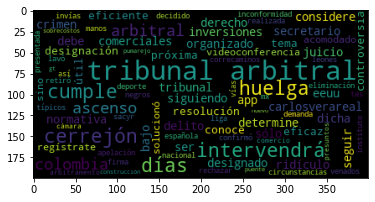

In [52]:
palabras = data.preproces.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

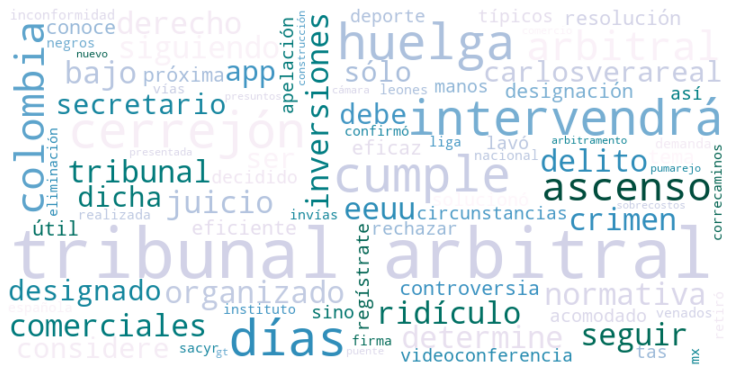

In [53]:
palabras = data.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='PuBuGn_r',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

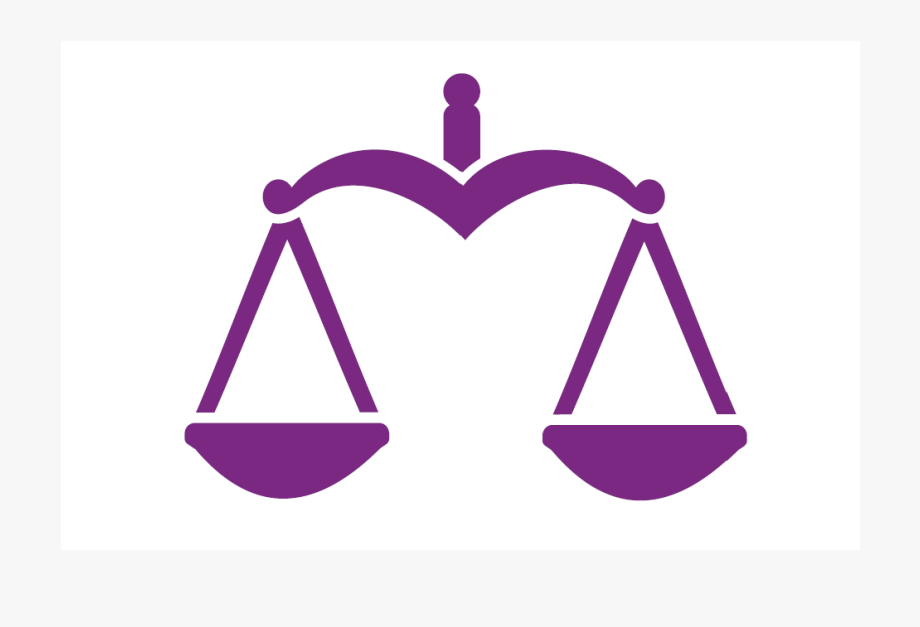

In [64]:
manos = PIL.Image.open('arbitraje.png')
display(manos)

In [65]:
mask = np.array(manos)
mask

array([[[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       ...,

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247

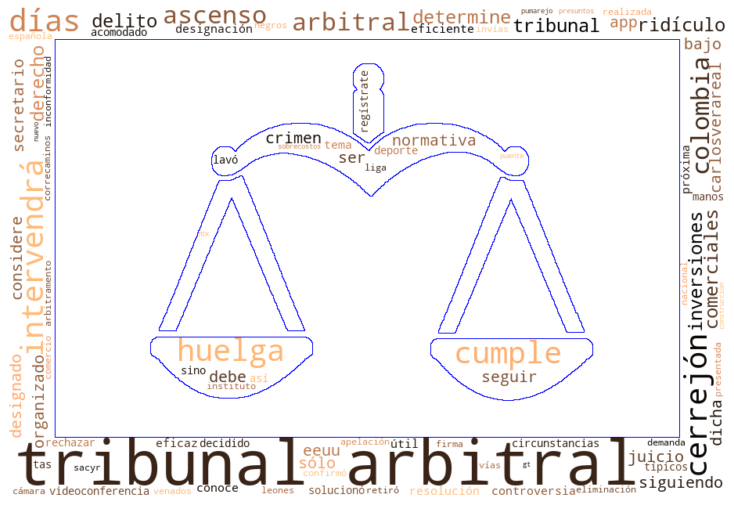

In [66]:
palabras = data.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='copper_r',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("manos.jpg")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Modelo de LDA

In [57]:
import re
import pandas as pd 
from pprint import pprint

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [58]:
path = 'datos271120.csv'
data2 = pd.read_csv(path)
print(f"Tenemos {data.shape[0]:,d} documentos") #esto se hace por buena práctica, saber cuántos documentos tenemos
data2['tweet'][0] #esto lo hacemos para que nos muestre un texto



Tenemos 8 documentos


'#Colombia: Huelga en el Cerrejón cumple 80 días e intervendrá un Tribunal Arbitral https://t.co/EUP8pF5fcJ'

In [59]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ",texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto

data2['preprocesado'] = data['tweet'].apply(lambda texto: pre_procesado(texto))

data2

,tweet,date,city,user_location,place,coordinates,id,link,preprocesado
0,#Colombia: Huelga en el Cerrejón cumple 80 día...,2020-11-23 14:01:46,Bogotá,Argentina,NaN,NaN,1330874182008250371,https://twitter.com/i/web/status/1330874182008...,"[colombia, huelga, cerrejón, cumple, días, int..."
1,“Es ridículo en el derecho que un tribunal arb...,2020-11-23 12:03:17,Bogotá,Ecuador,Place(_api=<tweepy.api.API object at 0x0000027...,NaN,1330844368232730626,https://twitter.com/i/web/status/1330844368232...,"[ridículo, derecho, tribunal, arbitral, invers..."
2,Colombia: Huelga en el Cerrejón cumple 80 días...,2020-11-22 17:03:35,Bogotá,Argentina,NaN,NaN,1330557550698393602,https://twitter.com/i/web/status/1330557550698...,"[colombia, huelga, cerrejón, cumple, días, int..."
3,#internacional | 🇨🇴 Colombia: Huelga en el Cer...,2020-11-22 16:07:04,Bogotá,Argentina,NaN,NaN,1330543329252093953,https://twitter.com/i/web/status/1330543329252...,"[internacional, colombia, huelga, cerrejón, cu..."
4,Un secretario arbitral sólo debe ser designado...,2020-11-21 21:27:48,Bogotá,"Caracas, Venezuela",NaN,NaN,1330261654483906563,https://twitter.com/i/web/status/1330261654483...,"[secretario, arbitral, sólo, debe, ser, design..."
5,"@isanellacc Porque todo se solucionó, sino se ...",2020-11-19 19:23:53,Bogotá,"Lima, Peru",NaN,NaN,1329505695524397059,https://twitter.com/i/web/status/1329505695524...,"[isanellacc, solucionó, sino, acomodado, circu..."
6,SIN ASCENSO!\n\nEl Tribunal Arbitral del Depor...,2020-11-19 19:06:31,Bogotá,México,NaN,NaN,1329501324749180930,https://twitter.com/i/web/status/1329501324749...,"[ascenso, tribunal, arbitral, deporte, tas, de..."
7,"La firma española Sacyr, confirmó que retiró s...",2020-11-19 12:15:00,Bogotá,Bogotá,NaN,NaN,1329397762526310402,https://twitter.com/i/web/status/1329397762526...,"[firma, española, sacyr, confirmó, retiró, dem..."


In [60]:
dictionary = Dictionary(data2['preprocesado'].values)
dictionary

In [61]:
dictionary.filter_extremes

corpus = [dictionary.doc2bow(text) for text in data2['preprocesado'].values]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(0, 1),
  (2, 2),
  (8, 2),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (12, 1),
  (13, 1),
  (38, 1),
  (39, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (12, 1),
  (13, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(0, 2),
  (2, 2),
  (8, 2),
  (12, 2),
  (13, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61

In [62]:
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)
model

model.print_topics(num_words=15)

[(0,
  '0.052*"t" + 0.027*"nacional" + 0.027*"sobrecostos" + 0.027*"demanda" + 0.027*"española" + 0.027*"firma" + 0.027*"presuntos" + 0.027*"nuevo" + 0.027*"invías" + 0.027*"confirmó" + 0.027*"construcción" + 0.027*"cámara" + 0.027*"gt" + 0.027*"instituto" + 0.027*"arbitramento"'),
 (1,
  '0.048*"arbitral" + 0.048*"co" + 0.048*"https" + 0.048*"t" + 0.033*"ascenso" + 0.033*"tribunal" + 0.017*"resolución" + 0.017*"debe" + 0.017*"designación" + 0.017*"designado" + 0.017*"dicha" + 0.017*"eficaz" + 0.017*"próxima" + 0.017*"cfvfoqskwq" + 0.017*"videoconferencia"'),
 (2,
  '0.009*"arbitral" + 0.009*"https" + 0.009*"tribunal" + 0.009*"cumple" + 0.009*"t" + 0.009*"co" + 0.009*"cerrejón" + 0.009*"intervendrá" + 0.009*"colombia" + 0.009*"días" + 0.009*"huelga" + 0.009*"ascenso" + 0.009*"así" + 0.009*"xqlxr" + 0.009*"yhbusnv"'),
 (3,
  '0.059*"tribunal" + 0.059*"arbitral" + 0.059*"cerrejón" + 0.059*"colombia" + 0.059*"días" + 0.059*"huelga" + 0.059*"intervendrá" + 0.059*"cumple" + 0.059*"co" + 0.0

In [63]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
# pyLDAvis.save_html(lda_display, 'lda.html')